# Mixtures of Gaussian Processes with GPclust


This notebook accompanies the paper

**Nonparameteric Clustering of Structured Time Series**  
_James Hensman, Magnus Rattray and Neil D. Lawrence_  
IEEE TPAMI 2014

The code is available at <https://github.com/mathDR/gpclust> . The GPclust module depends on [GPflow](https://github.com/GPflow).  

The hierachical Gaussian process model was fleshed out in 

**Hierarchical Bayesian modelling of gene expression time series  
across irregularly sampled replicates and clusters**  
_James Hensman, Neil D. Lawrence and Magnus Rattray_

http://www.biomedcentral.com/1471-2105/14/252



In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'#'svg' would be better, but eats memory for these big plots.
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import numpy as np
import random
import GPclust
import GPflow
np.random.seed(0)

## A simple point process dataset

Here's a simulated dataset that contains the simple features that we expect to have in real data sets: . 

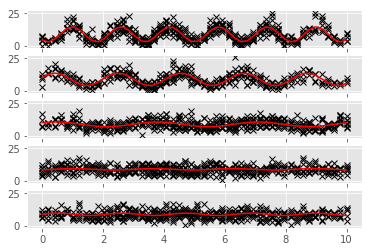

In [2]:
PLOTTING = True
Nclust = 5
Nobs = [np.random.randint(12,17) for i in range(Nclust)]
N = 50
times = np.linspace(0,10,N)
X = []
Y = []
if PLOTTING:
    f, ax = plt.subplots(Nclust, sharex=True, sharey=True)
for i in range(Nclust):
    # pick random parameters for this function:
    A = 8*np.random.rand()-1
    omega = 2*np.pi*np.random.rand()
    phase = 2*np.pi*np.random.rand()
    
    for j in xrange(Nobs[i]):
        a,b = np.random.randint(N),np.random.randint(N)
        start = min(a,b)
        end = max(a,b)
        if end-start < 25:
            # Need a longer sample
            if start > (N-end):
                end = start
                start = 0
            else:
                start = end
                end = N
        
        t = times[start:end]
        try:
            y = np.asarray(np.random.poisson(A*np.cos(omega*t+phase) + 9.0),dtype=np.double)
        except ValueError:
            print A*np.cos(omega*t+phase) + 9.0
        X.append(t.reshape(-1,1))
        Y.append(y.reshape(-1,1))
        if PLOTTING:
            ax[i].plot(t,y,'kx')
    if PLOTTING:
        ax[i].plot(times,A*np.cos(omega*times+phase) + 9.0,'r')
plt.show()


In the plots above, we show the underlying mean of the Poisson process for each cluster as a smooth red function, and the data associated with the cluster as black crosses. 

In [3]:
Z = np.linspace(np.min(times), np.max(times),5).reshape(-1,1)

In [4]:
k_underlying = GPflow.kernels.RBF(1)*GPflow.kernels.Cosine(1)
likelihood = GPflow.likelihoods.Poisson()

m = GPclust.MOGP(X, Y, Z, k_underlying, likelihood, num_clusters=5, alpha=1.0, prior_Z='symmetric')
#m.optimize()
#m.systematic_splits(verbose=False)

In [5]:
print m.log_likelihood()

-35247.1060478


In [6]:
from time import clock

In [7]:
t0 = clock()
m.optimize()
print clock() - t0

iteration 2 bound=-28150.7517494 grad=392474.867845, beta=0
iteration 3 bound=-27988.4249744 grad=3281.9964419, beta=0.0
iteration 5 bound=-27988.4048414 grad=0.0387447947678, beta=0.0
iteration 7 bound=-27988.4048085 grad=6.31918799592e-05, beta=0.04025318678
iteration 8 bound=-27988.4048084 grad=1.62130014819e-07, beta=0.0411877663239
vb converged (ftol)
vb converged (gtol)
386.192255


In [9]:
#t0 = clock()
#mod.systematic_splits(verbose=False)
#print clock() - t0